In [243]:
contractions_dict = {
  "ain't": "aint",
  "aren't": "are not",
  "can't": "can not",
  "can't've": "can not have",
  "'cause": "because",
  "bc": "because",
  "b/c": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'da": "you would have",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}
c_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))


def expand_contractions(text, c_re=c_re):
    def get_contraction_to_replace(match):
        return contractions_dict[match.group(0)]
    return c_re.sub(get_contraction_to_replace, text.lower())

In [231]:
import nltk
import re, string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer 
from nltk.tokenize import TweetTokenizer
from nltk.tokenize.treebank import TreebankWordTokenizer, TreebankWordDetokenizer
import pandas as pd 
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns

%matplotlib inline


In [288]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import inflect
from spellchecker import SpellChecker

In [397]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# lower
# stopwords
# punctuation
# 
def remove_img_tag(text):
    to_remove = 'img:'
    text  = re.sub(to_remove, ' ', text)
    return text
    
def remove_html_tag(text):
    pattern = r'http:\/\/.*[\r\n]*'
    text = re.sub(pattern, '', text)
    return text

def remove_doublespace(text):
    pattern = r'['  ', '   ']'
    text = re.sub(pattern, ' ', text)
    return text
def remove_nan_string(text):
    to_remove = 'nan'
    text = re.sub(to_remove, ' ', text)
    return text

def remove_special_characters(text):
    pattern = r'[^a-zA-z],' 
    text = re.sub(pattern, '', text)
    return text


In [234]:
tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
lemmatizer = WordNetLemmatizer() 
stemmer = PorterStemmer()
dig2word = inflect.engine()
stop_list = stopwords.words('english')  

In [338]:
c_re = [(re.compile(contraction), repl) for (contraction, repl) in contractions_dict.items()]
c_re

[(re.compile(r"ain't", re.UNICODE), 'aint'),
 (re.compile(r"aren't", re.UNICODE), 'are not'),
 (re.compile(r"can't", re.UNICODE), 'can not'),
 (re.compile(r"can't've", re.UNICODE), 'can not have'),
 (re.compile(r"'cause", re.UNICODE), 'because'),
 (re.compile(r'bc', re.UNICODE), 'because'),
 (re.compile(r'b/c', re.UNICODE), 'because'),
 (re.compile(r"could've", re.UNICODE), 'could have'),
 (re.compile(r"couldn't", re.UNICODE), 'could not'),
 (re.compile(r"couldn't've", re.UNICODE), 'could not have'),
 (re.compile(r"didn't", re.UNICODE), 'did not'),
 (re.compile(r"doesn't", re.UNICODE), 'does not'),
 (re.compile(r"don't", re.UNICODE), 'do not'),
 (re.compile(r"hadn't", re.UNICODE), 'had not'),
 (re.compile(r"hadn't've", re.UNICODE), 'had not have'),
 (re.compile(r"hasn't", re.UNICODE), 'has not'),
 (re.compile(r"haven't", re.UNICODE), 'have not'),
 (re.compile(r"he'd", re.UNICODE), 'he would'),
 (re.compile(r"he'd've", re.UNICODE), 'he would have'),
 (re.compile(r"he'll", re.UNICODE), '

In [376]:
c_re = re.compile('|'.join('(%s)' % k for k in contractions_dict.keys()))
c_re

re.compile(r"(ain't)|(aren't)|(can't)|(can't've)|('cause)|(bc)|(b/c)|(could've)|(couldn't)|(couldn't've)|(didn't)|(doesn't)|(don't)|(hadn't)|(hadn't've)|(hasn't)|(haven't)|(he'd)|(he'd've)|(he'll)|(he'll've)|(he's)|(how'd)|(how'd'y)|(how'll)|(how's)|(I'd)|(I'd've)|(I'll)|(I'll've)|(I'm)|(I've)|(isn't)|(it'd)|(it'd've)|(it'll)|(it'll've)|(it's)|(let's)|(ma'am)|(mayn't)|(might've)|(mightn't)|(mightn't've)|(must've)|(mustn't)|(mustn't've)|(needn't)|(needn't've)|(o'clock)|(oughtn't)|(oughtn't've)|(shan't)|(sha'n't)|(shan't've)|(she'd)|(she'd've)|(she'll)|(she'll've)|(she's)|(should've)|(shouldn't)|(shouldn't've)|(so've)|(so's)|(that'd)|(that'd've)|(that's)|(there'd)|(there'd've)|(there's)|(they'd)|(they'd've)|(they'll)|(they'll've)|(they're)|(they've)|(to've)|(wasn't)|(we'd)|(we'd've)|(we'll)|(we'll've)|(we're)|(we've)|(weren't)|(what'll)|(what'll've)|(what're)|(what's)|(what've)|(when's)|(when've)|(where'd)|(where's)|(where've)|(who'll)|(who'll've)|(who's)|(who've)|(why's)|(why've)|(will'

In [446]:
#### text preprocessing

def tweet_preprocess(df): 
    """combine regex and tokenization text processing for tweet text processing"""
    # dealing with those damn contractions
    contractions_dict = {
  "aint": "are not",
  "arent": "are not",
  "cant": "can not",
  "cause": "because",
  "bc": "because",
  "b/c": "because",
  "couldve": "could have",
  "couldnt": "could not",
  "didnt": "did not",
  "doesnt": "does not",
  "dont": "do not",
  "hadnt": "had not",
  "hasnt": "has not",
  "havent": "have not",
  "hed": "he would",
  "hes": "he is",
  "howd": "how did",
  "howdy": "how do you",
  "howll": "how will",
  "hows": "how is",
  "id": "i would",
  "ida": "i would have",
  "im": "i am",
  "ive": "i have",
  "isnt": "is not",
  "itd": "it had",
  "itll": "it will",
  "its": "it is",
  "lets": "let us",
  "maam": "madam",
  "mightve": "might have",
  "mighta": "might have",
  "mightnt": "might not",
  "mustve": "must have",
  "musta": "must have",
  "mustnt": "must not",
  "neednt": "need not",
  "oclock": "of the clock",
  "shes": "she is",
  "shoulda": "should have",
  "shouldve": "should have",
  "shouldnt": "should not",
  "so'd": "so did",
  "thatd": "that would",
  "thats": "that is",
  "thered": "there had",
  "theres": "there is",
  "theyd": "they would",
  "theyda": "they would have",
  "theyll": "they will",
  "theyre": "they are",
  "theyve": "they have",
  "wasnt": "was not",
  "weve": "we have",
  "werent": "were not",
  "whatll": "what will",
  "whatllve": "what will have",
  "whatre": "what are",
  "whats": "what is",
  "whatve": "what have",
  "whens": "when is",
  "whenve": "when have",
  "whered": "where did",
  "whers": "where is",
  "whereve": "where have",
  "wholl": "who will",
  "whollve": "who will have",
  "whos": "who is",
  "whove": "who have",
  "whys": "why is",
  "whyve": "why have",
  "willve": "will have",
  "wont": "will not",
  "wontve": "will not have",
  "wouldve": "would have",
  "wouldnt": "would not",
  "wouldntve": "would not have",
  "yall": "you all",
  "yalls": "you alls",
  "yalld": "you all would",
  "yalldve": "you all would have",
  "yallre": "you all are",
  "yallve": "you all have",
  "youd": "you had",
  "youda": "you would have",
  "youdve": "you would have",
  "youll": "you you will",
  "youllve": "you you will have",
  "youre": "you are",
  "youve": "you have",
  "ain't": "are not",
  "aren't": "are not",
  "can't": "can not",
  "can't've": "can not have",
  "'cause": "because",
  "bc": "because",
  "b/c": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'da": "you would have",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have",
  "hwy": "highway",
  "fvck": "fuck",
  "im": "i am",
  "rt": "retweet",
  "fyi": "for your information",
  "omw": "on my way",
  "1st": "first",
  "2nd": "second",
  "3rd": "third",
  "4th": "fourth",


}

    def expand_contractions(text, contractions_dict=contractions_dict):
        contractions_list = list(contractions_dict.keys())
        for x in text:
            if x is in contractions_list:
                x = contractions.sub(lambda m: c_re[re.escape(m.group(0))], text)
        return text

    # function to expand contractions, remove urls and characters before tokenization processing
    def denoise_text(text):
        new_text = re.sub(r"\S*https?:\S*",  r"", text.lower())
        new_text = expand_contractions(new_text)
        new_text = re.sub(r"[^\w\s@#]",  r"", new_text)
        new_text = re.sub(r"[_,-]",  r" ", new_text)
        text = re.sub('[^\u0000-\u007f]', '',  new_text)
        return text 
    
# tokenization & lemmatization function returns tokens    
    def lemmatize_text(text):
        tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
        lemmatizer = WordNetLemmatizer() 
        return [lemmatizer.lemmatize(w, pos='v') for w in tokenizer.tokenize(text)]

# tokenization & stemmer function returns tokens
    def stem_text(text):
        tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
        stemmer = PorterStemmer()
        return [stemmer.stem(w) for w in tokenizer.tokenize(text)]

# replace integers with string formatted words for numbers
    def replace_numbers(words):
        dig2word = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = dig2word.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

# remove stopwords   
    def remove_stopwords(words):
        new_words = []
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        return new_words

# wrapper for tokenized text    
    def normalize_text(words):
        words = replace_numbers(words)
        words = remove_stopwords(words)
        return words
    

    def text_prepare(text):
        text = denoise_text(text)
        text = lemmatize_text(text)
        text = ' '.join([x for x in normalize_text(text)])
        return text
    
    df = [text_prepare(x) for x in df]

    return df 
    

In [447]:
test = tweet_preprocess(df.text)

TypeError: 're.Pattern' object is not subscriptable

In [448]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [445]:
test

['deeds reason #earetweethquake may allah forgi us',
 'forest fire near la ronge sask canada',
 'resi wouldents ask shelter place notify officer evacuation shelter place order expect',
 'thirteen thousand people recei #wildfires evacuation order california',
 'get send photo ruby #alaska smoke #wildfires pour school',
 '#rockyfire update california highway twenty close directions due lake county fire #cafire #wildfires',
 '#flood #disaster heavy rain becauses flash flood streets manitou colorado spring areas',
 'top hill see fire woods',
 'emergency evacuation happen build across street',
 'afrai would tornado come area',
 'three people die heat wave far',
 'haha south tampa get flood hah wait second li south tampa gonna gonna fuck #flooding',
 '#raining #flooding #flori woulda #tampabay #tampa eighteen nineteen days lose count',
 '#flood bago myanmar #we arri bago',
 'damage school bus eighty multi car crash #breaking',
 'man',
 'love fruit',
 'summer lovely',
 'car fast',
 'goooaaal'

In [431]:
hashtag_list = []
# splitting the text into words
for row in test:
    for x in row.split():
        if x.startswith('#') == True:
            hashtag_list.append(x)

print(hashtag_list)

['#earetweethquake', '#wildfires', '#alaska', '#wildfires', '#rockyfire', '#cafire', '#wildfires', '#flood', '#disaster', '#flooding', '#raining', '#flooding', '#flori', '#tampabay', '#tampa', '#flood', '#we', '#breaking', '#metal', '#retweet', '#africanbaze', '#mufc', '#bri', '#nsfw', '#nsfw', '#kurds', '#diyala', '#california', '#cli', '#energy', '#nowplaying', '#edm', '#nashvilletraffic', '#santaclara', '#bayarea', '#traffic', '#personalinjury', '#solicitor', '#otleyhour', '#stlouis', '#caracci', '#truckcrash', '#foretweetworetweeth', '#ashville', '#traffic', '#manche', '#traffic', '#breaking', '#hagerstown', '#whag', '#bahrain', '#arrestpastornganga', '#dubstep', '#trapmusic', '#dnb', '#edm', '#dance', '#ices_', '#dubstep', '#trapmusic', '#dnb', '#edm', '#dance', '#ices_', '#growingupspoiled', '#dubstep', '#trapmusic', '#dnb', '#edm', '#dance', '#ices_', '#dubstep', '#trapmusic', '#dnb', '#edm', '#dance', '#ices_', '#dubstep', '#trapmusic', '#dnb', '#edm', '#dance', '#ices_', '#dub

In [235]:
def lemmatize_text(text):
    tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
    lemmatizer = WordNetLemmatizer() 
    return [lemmatizer.lemmatize(w, pos='v') for w in tokenizer.tokenize(text)]

def stem_text(text):
    tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in tokenizer.tokenize(text)]

In [244]:

df['clean_text'] = df.text.map(expand_contractions)
df['clean_text'] = df.clean_text.replace({r"\S*https?:\S*" : r""}, regex=True)
df['clean_text'] = df.clean_text.replace({r"[^\w\s@]" : r""}, regex=True)
df['clean_text'] = df.clean_text.replace({"/d" : r""}, regex=True) 

df['keyword'] = df.keyword.astype(str).str.lower()
df['keyword'] = df.keyword.replace({r"%20" : r" "}, regex=True)
df['keyword_lemma'] = df['keyword'].apply(lemmatize_text)

df['location'] = df.location.astype(str).str.lower()
df['location'] = df.location.replace({r"[^\w\s# ]" : r""}, regex=True)

df['stop_rem_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_list)]))
df['text_lemma']= df['stop_rem_text'].apply(lemmatize_text)
df['text_stem']= df['stop_rem_text'].apply(stem_text)

In [245]:
pos_text_tags = df['text_lemma'].apply(lambda row: [nltk.pos_tag(row) for item in row])

In [246]:
pos_keyword_tags = df['keyword'].apply(lambda row: [nltk.pos_tag(row) for item in row])

In [247]:
hashtag_list = []
# splitting the text into words
for row in df.text:
    for x in row.split():
        if x.startswith('#') == True:
            hashtag_list.append(x)

print(hashtag_list)

['#earthquake', '#wildfires', '#Alaska', '#wildfires', '#RockyFire', '#CAfire', '#wildfires', '#flood', '#disaster', '#flooding', '#raining', '#flooding', '#Florida', '#TampaBay', '#Tampa', '#Flood', '#We', '#BREAKING', '#metal', '#RT', '#AFRICANBAZE:', '#mufc', '#Bridgetown', '#nsfw', '#nsfw', '#Kurds', '#Diyala', '#California', '#climate', '#energy', '#NowPlaying:', '#EDM', '#NashvilleTraffic.', '#SantaClara', '#BayArea', '#Traffic', '#personalinjury', '#solicitor', '#OtleyHour', '#stlouis', '#caraccidentlawyer', '#TruckCrash', '#FortWorth', '#Ashville', '#traffic', '#Manchester', '#traffic', '#BREAKING:', '#Hagerstown', '#WHAG', '#Bahrain', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#Dance', '#Ices\x89Û_', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#Dance', '#Ices\x89Û_', '#GrowingUpSpoiled', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#Dance', '#Ices\x89Û_', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#Dance', '#Ices\x89Û_', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#Dance', '#Ices\

In [248]:
df

,id,keyword,location,text,target,clean_text,keyword_lemma,stop_rem_text,text_lemma,text_stem
0,1,nan,nan,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,[nan],deeds reason earthquake may allah forgive us,"[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]"
1,4,nan,nan,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,[nan],forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]"
2,5,nan,nan,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,[nan],residents asked shelter place notified officer...,"[residents, ask, shelter, place, notify, offic...","[resid, ask, shelter, place, notifi, offic, ev..."
3,6,nan,nan,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,[nan],13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,7,nan,nan,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,[nan],got sent photo ruby alaska smoke wildfires pou...,"[get, send, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...,...,...,...
7608,10869,nan,nan,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...,[nan],two giant cranes holding bridge collapse nearb...,"[two, giant, crane, hold, bridge, collapse, ne...","[two, giant, crane, hold, bridg, collaps, near..."
7609,10870,nan,nan,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @thetawniest the out of control w...,[nan],@aria_ahrary @thetawniest control wild fires c...,"[control, wild, fire, california, even, northe...","[control, wild, fire, california, even, northe..."
7610,10871,nan,nan,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m194 0104 utc5km s of volcano hawaii,[nan],m194 0104 utc5km volcano hawaii,"[m194, 0104, utc, 5km, volcano, hawaii]","[m194, 0104, utc, 5km, volcano, hawaii]"
7611,10872,nan,nan,Police investigating after an e-bike collided ...,1,police investigating after an ebike collided w...,[nan],police investigating ebike collided car little...,"[police, investigate, ebike, collide, car, lit...","[polic, investig, ebik, collid, car, littl, po..."


In [228]:
df.location[df.location != 'nan']

31                       birmingham
32      est september 2012  bristol
33                           africa
34                  philadelphia pa
35                        london uk
                   ...             
7575                             tn
7577         #newcastleupontyne #uk
7579               vancouver canada
7580                        london 
7581                        lincoln
Name: location, Length: 5080, dtype: object

In [224]:
df.keyword.unique()

array(['nan', 'ablaze', 'accident', 'aftershock', 'airplane accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown up', 'body bag', 'body bagging', 'body bags',
       'bomb', 'bombed', 'bombing', 'bridge collapse',
       'buildings burning', 'buildings on fire', 'burned', 'burning',
       'burning buildings', 'bush fires', 'casualties', 'casualty',
       'catastrophe', 'catastrophic', 'chemical emergency', 'cliff fall',
       'collapse', 'collapsed', 'collide', 'collided', 'collision',
       'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone',
       'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge',
       'deluged', 'demolish', 'demolished', 'demolition', 'derail',
       'derailed', 'derailment', 'des

In [225]:
df.loc[df['keyword'] != 'nan']

,id,keyword,location,text,target,clean_text,stop_rem_text,type_lemma,type_stem
31,48,ablaze,birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,@bbecausemtd wholesale markets ablaze,@bbecausemtd wholesale markets ablaze,"[wholesale, market, ablaze]","[wholesal, market, ablaz]"
32,49,ablaze,est september 2012 bristol,We always try to bring the heavy. #metal #RT h...,0,we always try to bring the heavy metal,always try bring heavy metal,"[always, try, bring, heavy, metal]","[alway, tri, bring, heavi, metal]"
33,50,ablaze,africa,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking newsnigeria flag set abla...,africanbaze breaking newsnigeria flag set abla...,"[africanbaze, break, newsnigeria, flag, set, a...","[africanbaz, break, newsnigeria, flag, set, ab..."
34,52,ablaze,philadelphia pa,Crying out for more! Set me ablaze,0,crying out for more set me ablaze,crying set ablaze,"[cry, set, ablaze]","[cri, set, ablaz]"
35,53,ablaze,london uk,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,on plus side look at the sky last night it was...,plus side look sky last night ablaze,"[plus, side, look, sky, last, night, ablaze]","[plu, side, look, sky, last, night, ablaz]"
...,...,...,...,...,...,...,...,...,...
7578,10830,wrecked,nan,@jt_ruff23 @cameronhacker and I wrecked you both,0,@jt_ruff23 @cameronhacker and i wrecked you both,@jt_ruff23 @cameronhacker wrecked,[wreck],[wreck]
7579,10831,wrecked,vancouver canada,Three days off from work and they've pretty mu...,0,three days off from work and they have pretty ...,three days work pretty much wrecked hahaha sho...,"[three, days, work, pretty, much, wreck, hahah...","[three, day, work, pretti, much, wreck, hahaha..."
7580,10832,wrecked,london,#FX #forex #trading Cramer: Iger's 3 words tha...,0,fx forex trading cramer igers 3 words that wre...,fx forex trading cramer igers 3 words wrecked ...,"[fx, forex, trade, cramer, igers, 3, word, wre...","[fx, forex, trade, cramer, iger, 3, word, wrec..."
7581,10833,wrecked,lincoln,@engineshed Great atmosphere at the British Li...,0,@engineshed great atmosphere at the british li...,@engineshed great atmosphere british lion gig ...,"[great, atmosphere, british, lion, gig, tonigh...","[great, atmospher, british, lion, gig, tonight..."


In [226]:
df

,id,keyword,location,text,target,clean_text,stop_rem_text,type_lemma,type_stem
0,1,nan,nan,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this eahquake may ...,deeds reason eahquake may allah forgive us,"[deeds, reason, eahquake, may, allah, forgive,...","[deed, reason, eahquak, may, allah, forgiv, us]"
1,4,nan,nan,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]"
2,5,nan,nan,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,residents asked shelter place notified officer...,"[residents, ask, shelter, place, notify, offic...","[resid, ask, shelter, place, notifi, offic, ev..."
3,6,nan,nan,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,7,nan,nan,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,got sent photo ruby alaska smoke wildfires pou...,"[get, send, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...,...,...
7608,10869,nan,nan,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...,two giant cranes holding bridge collapse nearb...,"[two, giant, crane, hold, bridge, collapse, ne...","[two, giant, crane, hold, bridg, collaps, near..."
7609,10870,nan,nan,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @thetawniest the out of control w...,@aria_ahrary @thetawniest control wild fires c...,"[control, wild, fire, california, even, nohern...","[control, wild, fire, california, even, nohern..."
7610,10871,nan,nan,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m194 0104 utc5km s of volcano hawaii,m194 0104 utc5km volcano hawaii,"[m194, 0104, utc, 5km, volcano, hawaii]","[m194, 0104, utc, 5km, volcano, hawaii]"
7611,10872,nan,nan,Police investigating after an e-bike collided ...,1,police investigating after an ebike collided w...,police investigating ebike collided car little...,"[police, investigate, ebike, collide, car, lit...","[polic, investig, ebik, collid, car, littl, po..."


Text(0.5, 1.0, 'target count')

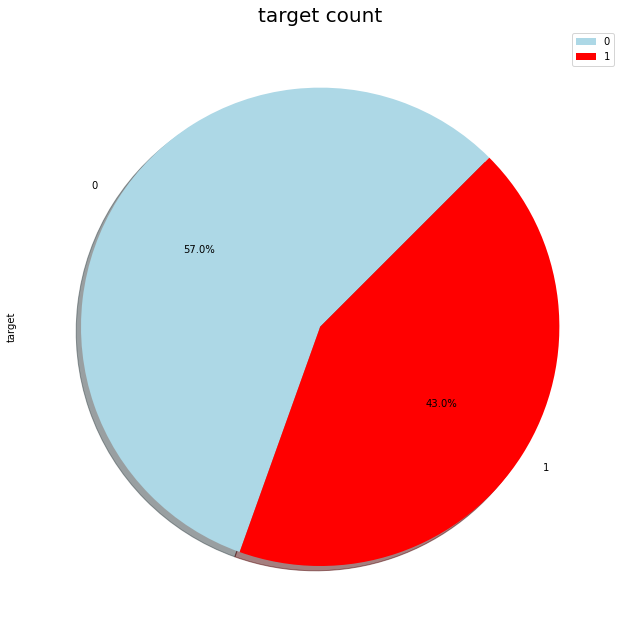

In [258]:
plt.figure(figsize=(11,11))
colors = ['lightblue', 'red']
expl = (0, 0.1)
df.target.value_counts().plot(kind='pie', legend=True, startangle=45, shadow=True, 
                             colors=colors, autopct='%1.1f%%')
plt.title('target count', fontsize=20)

In [287]:
spell = SpellChecker()

In [289]:
misspelled = spell.unknown(test)

In [291]:
for word in misspelled:
    spell.correction(word) #

KeyboardInterrupt: 

In [290]:
misspelled

{'',
 'heat wave #squad #revitup #pizzarev',
 'hate white people mo',
 'sure make impact',
 'body bag bitch',
 'haha traumatise hell want job xxx',
 'band build fire play wednesday #rdg',
 'thirst curfew',
 'bag body smoke hot',
 'need friends booze darude sandstorm',
 'well dad survive drive',
 'egg desolate',
 'cafe run acid attack survivors #india',
 'collapse bed ugh im exhaust',
 'peacetime time national emergency',
 'empire avenue crush soul via',
 'another white mass murderer #antioch',
 'house start explode newåêheights',
 'nuclear bomb terrible weapon',
 'osp concern mount fatalities',
 'free hailstorm maxi',
 'im internally scream',
 'people survive like',
 '6beyonce pick fan army #beyhive',
 '@so @sorry deluge hell vines',
 'get money tomorrow riot',
 'change password link kick hijacker',
 'let follow',
 'laugh talk junk everyone panic mode',
 'real shit damage bitch',
 'bhavanas mom crush everyones soul',
 'hear lighten see thunder',
 'like beautiful ass tragedy lol',
 'lov